### Import dependencies

In [1]:
!pip install fastai
import torch
from fastai.basics import *
from fastai.vision import *
from fastai.metrics import error_rate
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Download Dataset

In [2]:
path = untar_data(URLs.CIFAR);
path_train = path/'train'
path_test = path/'test'
path_train.ls()
path_test.ls()

[PosixPath('/root/.fastai/data/cifar10/test/cat'),
 PosixPath('/root/.fastai/data/cifar10/test/airplane'),
 PosixPath('/root/.fastai/data/cifar10/test/ship'),
 PosixPath('/root/.fastai/data/cifar10/test/frog'),
 PosixPath('/root/.fastai/data/cifar10/test/automobile'),
 PosixPath('/root/.fastai/data/cifar10/test/horse'),
 PosixPath('/root/.fastai/data/cifar10/test/truck'),
 PosixPath('/root/.fastai/data/cifar10/test/deer'),
 PosixPath('/root/.fastai/data/cifar10/test/dog'),
 PosixPath('/root/.fastai/data/cifar10/test/bird')]

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.136162,1.028215,0.639100,12:14


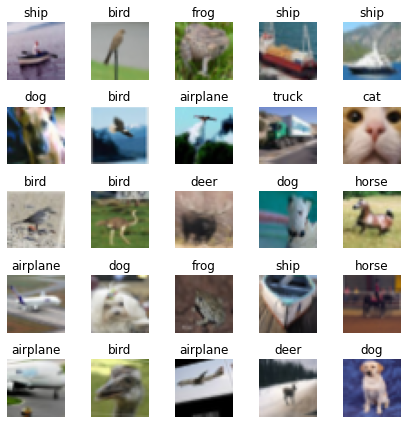

In [3]:
bs = 64 # batch size
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0)
# Normalize the dataset
data.normalize(cifar_stats)
# Images from the dataset
data.show_batch(rows=5, figsize=(6,6))
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(1, max_lr=slice(1e-3,1e-2))

### MixUP

In [8]:
learn = create_cnn(data, models.resnet34, metrics=accuracy).mixup()
learn.fit_one_cycle(1, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.865968,1.617255,0.423500,11:40


### Label Smoothing

In [9]:
learn = create_cnn(data, models.resnet34, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learn.fit_one_cycle(1, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.774165,1.705212,0.444700,11:43


### Cutout

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.614774,1.516275,0.451300,11:48
1,1.417655,1.325989,0.525100,11:45


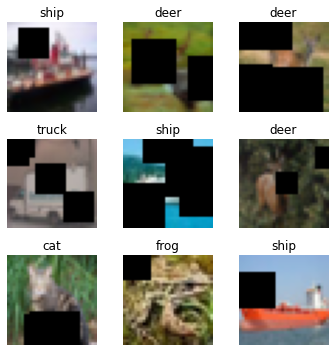

In [18]:
tfms = [cutout(n_holes=(1,4), length=(8, 20), p=1.),cutout(n_holes=(1,4), length=(8,20), p=1.)]
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=tfms, num_workers=0)
data.normalize(cifar_stats)
data.show_batch(rows=3, figsize=(5,5))
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

### TTA - Test-time augmentation

In [22]:
preds,targs = learn.TTA()
accuracy(preds, targs).item()

0.7857309094015474
